Początkowe x: -1.0
Znalezione minimum (x): -0.4502
Wartość funkcji w minimum: -0.2325


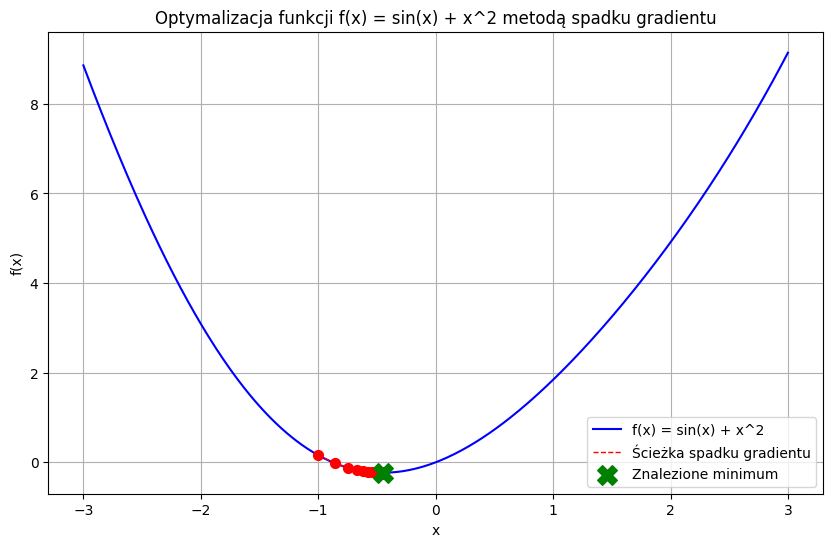

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Definicja funkcji f(x) i jej pochodnej f'(x)
def f(x):
    return np.sin(x) + x**2

def grad_f(x):
    return np.cos(x) + 2*x

# 2. Implementacja algorytmu spadku gradientu
def gradient_descent(func, grad_func, initial_x, learning_rate, iterations):
    x_values = [initial_x]
    y_values = [func(initial_x)]

    x = initial_x
    for i in range(iterations):
        gradient = grad_func(x)
        x = x - learning_rate * gradient # Aktualizacja x w kierunku przeciwnym do gradientu
        x_values.append(x)
        y_values.append(func(x))

    return x_values, y_values, x # Zwraca ścieżkę x, ścieżkę y i finalne x

# 3. Parametry spadku gradientu
initial_x = -1.0      # Początkowa wartość x (można eksperymentować)
learning_rate = 0.1   # Współczynnik uczenia (ważny parametr, ma wpływ na zbieżność)
iterations = 50       # Liczba iteracji

# Wykonanie spadku gradientu
x_path, y_path, final_x = gradient_descent(f, grad_f, initial_x, learning_rate, iterations)

print(f"Początkowe x: {initial_x}")
print(f"Znalezione minimum (x): {final_x:.4f}")
print(f"Wartość funkcji w minimum: {f(final_x):.4f}")

# 4. Wizualizacja procesu spadku gradientu
# Zakres x do wykreślenia funkcji
x_plot = np.linspace(-3, 3, 400)
y_plot = f(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='f(x) = sin(x) + x^2', color='blue')
plt.scatter(x_path, y_path, color='red', s=50, zorder=5) # Punkty iteracji
plt.plot(x_path, y_path, color='red', linestyle='--', linewidth=1, label='Ścieżka spadku gradientu') # Ścieżka

plt.scatter(final_x, f(final_x), color='green', marker='X', s=200, zorder=6, label='Znalezione minimum')

plt.title('Optymalizacja funkcji f(x) = sin(x) + x^2 metodą spadku gradientu')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Trening modelu z ReLU ---

--- Trening modelu z Sigmoid ---

Loss (MSE) na zbiorze testowym dla modelu z ReLU: 5671.7979
Loss (MSE) na zbiorze testowym dla modelu z Sigmoid: 10633.3379


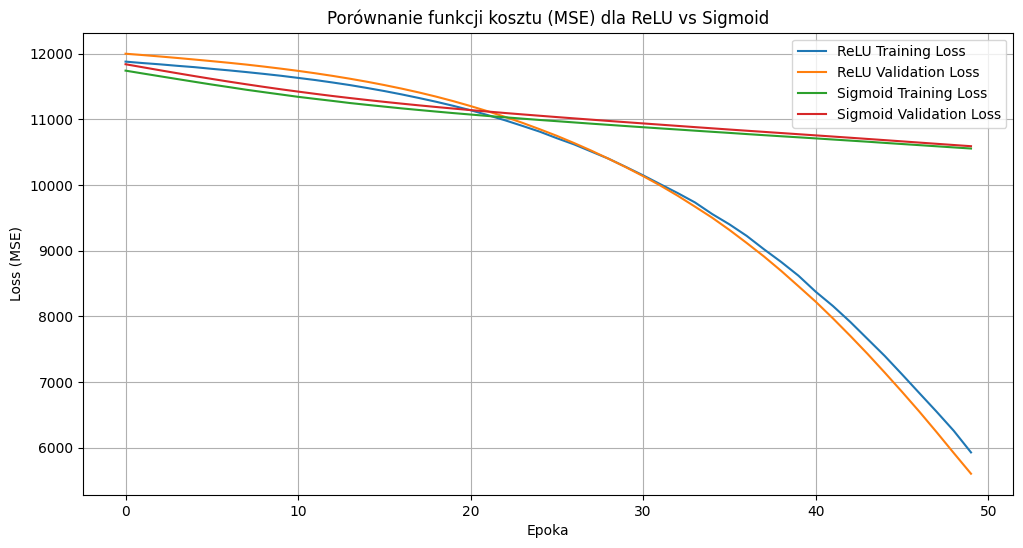

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


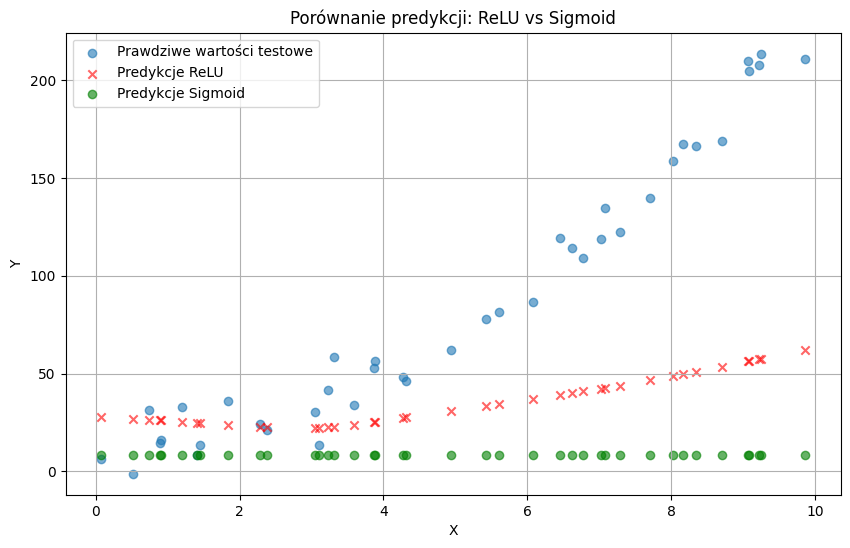


Obserwacje:
W tym przykładzie, model z aktywacją ReLU prawdopodobnie osiągnie niższą wartość straty (loss) i będzie lepiej dopasowany do danych, co jest typowe dla zadań regresji i głębokich sieci.
Sigmoid ma tendencję do problemu zanikającego gradientu, co może utrudniać uczenie, szczególnie w głębszych sieciach lub przy większych zakresach danych wejściowych.


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Generowanie sztucznych danych do regresji
np.random.seed(42)
X_reg = np.random.rand(200, 1) * 10 # 200 próbek, 1 cecha, zakres 0-10
y_reg = 2 * X_reg**2 + 3 * X_reg + 5 + np.random.randn(200, 1) * 10 # Funkcja kwadratowa z szumem

# Podział na zbiór treningowy i testowy
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Skalowanie cech (dobra praktyka dla sieci neuronowych)
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# 2. Budowa i trening sieci neuronowej z funkcją aktywacji ReLU
model_relu = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_reg_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1) # Warstwa wyjściowa do regresji, bez funkcji aktywacji (lub liniowa)
])

model_relu.compile(optimizer='adam', loss='mse') # MSE dla regresji

print("\n--- Trening modelu z ReLU ---")
history_relu = model_relu.fit(X_train_reg_scaled, y_train_reg, epochs=50, batch_size=32, verbose=0, validation_split=0.2)

# 3. Budowa i trening sieci neuronowej z funkcją aktywacji Sigmoid
model_sigmoid = Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train_reg_scaled.shape[1],)),
    Dense(32, activation='sigmoid'),
    Dense(1)
])

model_sigmoid.compile(optimizer='adam', loss='mse')

print("\n--- Trening modelu z Sigmoid ---")
history_sigmoid = model_sigmoid.fit(X_train_reg_scaled, y_train_reg, epochs=50, batch_size=32, verbose=0, validation_split=0.2)

# 4. Porównanie wyników
loss_relu = model_relu.evaluate(X_test_reg_scaled, y_test_reg, verbose=0)
loss_sigmoid = model_sigmoid.evaluate(X_test_reg_scaled, y_test_reg, verbose=0)

print(f"\nLoss (MSE) na zbiorze testowym dla modelu z ReLU: {loss_relu:.4f}")
print(f"Loss (MSE) na zbiorze testowym dla modelu z Sigmoid: {loss_sigmoid:.4f}")

# Wizualizacja funkcji kosztu podczas treningu
plt.figure(figsize=(12, 6))
plt.plot(history_relu.history['loss'], label='ReLU Training Loss')
plt.plot(history_relu.history['val_loss'], label='ReLU Validation Loss')
plt.plot(history_sigmoid.history['loss'], label='Sigmoid Training Loss')
plt.plot(history_sigmoid.history['val_loss'], label='Sigmoid Validation Loss')
plt.title('Porównanie funkcji kosztu (MSE) dla ReLU vs Sigmoid')
plt.xlabel('Epoka')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Wizualizacja predykcji
plt.figure(figsize=(10, 6))
plt.scatter(X_test_reg, y_test_reg, label='Prawdziwe wartości testowe', alpha=0.6)

# Predykcje dla ReLU
y_pred_relu = model_relu.predict(X_test_reg_scaled)
plt.scatter(X_test_reg, y_pred_relu, label='Predykcje ReLU', alpha=0.6, marker='x', color='red')

# Predykcje dla Sigmoid
y_pred_sigmoid = model_sigmoid.predict(X_test_reg_scaled)
plt.scatter(X_test_reg, y_pred_sigmoid, label='Predykcje Sigmoid', alpha=0.6, marker='o', color='green')

plt.title('Porównanie predykcji: ReLU vs Sigmoid')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

print("\nObserwacje:")
print("W tym przykładzie, model z aktywacją ReLU prawdopodobnie osiągnie niższą wartość straty (loss) i będzie lepiej dopasowany do danych, co jest typowe dla zadań regresji i głębokich sieci.")
print("Sigmoid ma tendencję do problemu zanikającego gradientu, co może utrudniać uczenie, szczególnie w głębszych sieciach lub przy większych zakresach danych wejściowych.")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Kształt danych treningowych: (60000, 28, 28, 1)
Kształt etykiet treningowych: (60000, 10)
Kształt danych testowych: (10000, 28, 28, 1)
Kształt etykiet testowych: (10000, 10)


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


--- Rozpoczynanie treningu CNN na Fashion MNIST ---
Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7491 - loss: 0.7084 - val_accuracy: 0.8567 - val_loss: 0.4023
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8782 - loss: 0.3439 - val_accuracy: 0.8858 - val_loss: 0.3133
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8911 - loss: 0.2977 - val_accuracy: 0.8978 - val_loss: 0.2767
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9081 - loss: 0.2541 - val_accuracy: 0.9037 - val_loss: 0.2615
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9140 - loss: 0.2295 - val_accuracy: 0.9123 - val_loss: 0.2461
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9267 - loss: 0.2011 - val_accuracy: 0.8997 - val_loss: 0.2669
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9332 - loss: 0.1816 - val_accuracy: 0.9137 - val_loss: 0.2396
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/ste

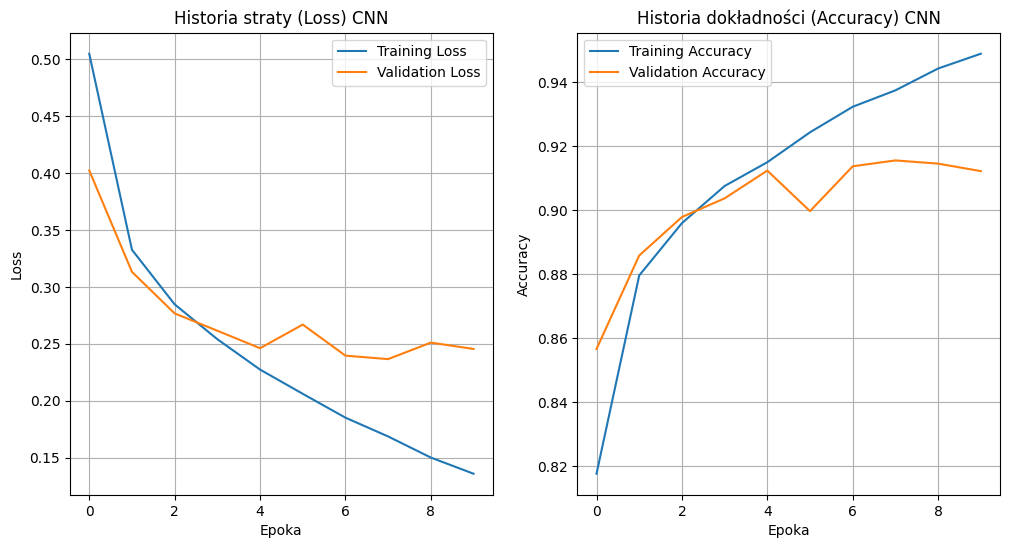

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical # Do konwersji etykiet na one-hot
import matplotlib.pyplot as plt

# 1. Ładowanie i przygotowanie danych Fashion MNIST
# Fashion MNIST jest dostępny bezpośrednio w Keras
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalizacja pikseli do zakresu [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Zmiana kształtu obrazów na (liczba_próbek, wysokość, szerokość, kanały) dla Conv2D
# Obrazy są w skali szarości, więc 1 kanał.
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Konwersja etykiet na format one-hot (potrzebne dla categorical_crossentropy)
train_labels_one_hot = to_categorical(train_labels, num_classes=10)
test_labels_one_hot = to_categorical(test_labels, num_classes=10)

print(f"Kształt danych treningowych: {train_images.shape}")
print(f"Kształt etykiet treningowych: {train_labels_one_hot.shape}")
print(f"Kształt danych testowych: {test_images.shape}")
print(f"Kształt etykiet testowych: {test_labels_one_hot.shape}")

# 2. Projektowanie sieci konwolucyjnej (CNN)
model_cnn = Sequential([
    # Warstwa konwolucyjna 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    # Warstwa konwolucyjna 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Spłaszczenie danych do warstw w pełni połączonych
    Flatten(),

    # Warstwy w pełni połączone (Dense)
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') # Warstwa wyjściowa z 10 klasami i softmax
])

# 3. Kompilacja modelu
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy', # Funkcja kosztu dla klasyfikacji wieloklasowej (one-hot)
                  metrics=['accuracy']) # Metryka do oceny podczas treningu

model_cnn.summary() # Podsumowanie architektury modelu

# 4. Trenowanie modelu
print("\n--- Rozpoczynanie treningu CNN na Fashion MNIST ---")
history_cnn = model_cnn.fit(train_images, train_labels_one_hot,
                            epochs=10, # Liczba epok
                            batch_size=64, # Rozmiar partii
                            validation_split=0.1) # 10% danych treningowych użyte jako walidacja

# 5. Testowanie modelu
print("\n--- Ocena modelu na zbiorze testowym ---")
test_loss, test_acc = model_cnn.evaluate(test_images, test_labels_one_hot, verbose=2)

print(f"\nDokładność na zbiorze testowym (test_accuracy): {test_acc:.4f}")
print(f"Strata na zbiorze testowym (test_loss): {test_loss:.4f}")

# Wizualizacja historii treningu
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Historia straty (Loss) CNN')
plt.xlabel('Epoka')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Historia dokładności (Accuracy) CNN')
plt.xlabel('Epoka')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()